# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Packages and dependences
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Get API key
from api import weather_api_key
from citipy import citipy

# Output File (CSV)
output_results_file = "output_results/cities_rm.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for lat_lngs and cities
lat_lngs = []
cities = []

# Create random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# find closest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create lists for data acquisition
city_name = []
cloudiness = []
countrylist = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []


print("Start Data Acquisition ")
print("--------------------------------------")

main_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url_query = f"{main_url}appid={weather_api_key}&units={units}&q="


#create loop to pull data
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url_query + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countrylist.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response["wind"]["speed"])
                    
               
  #print for no data found
    except(KeyError, IndexError):
        print("No city found.")
        print (url_query + city)


Start Data Acquisition 
--------------------------------------
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=belushya guba
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=illoqqortoormiut
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=taolanaro
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=nizhneyansk
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=sentyabrskiy
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=mullaitivu
No city found.
http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=grand river south east
No city fou

In [4]:
print(url_query + city)

http://api.openweathermap.org/data/2.5/weather?appid=5beae02d93e81bd78911308f0c788c88&units=imperial&q=buta


In [5]:
# Create a panda data frame
city_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : countrylist,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : maxTemp,
                "Wind Speed" : windSpeed

})

city_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [6]:
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Guanare,99,VE,1594101899,96,9.04,-69.74,72.86,2.10
1,Izumo,75,JP,1594101899,88,35.37,132.77,77.00,1.12
2,Bluff,94,NZ,1594101498,83,-46.60,168.33,39.00,3.00
3,Anadyr,75,RU,1594101560,87,64.75,177.48,48.20,2.24
4,Ushuaia,75,AR,1594101498,69,-54.80,-68.30,35.60,5.82
5,Hermanus,78,ZA,1594101504,75,-34.42,19.23,53.01,1.01
6,New Norfolk,2,AU,1594101517,80,-42.78,147.06,48.00,1.23
7,Nikolskoye,85,RU,1594101513,77,59.70,30.79,64.00,2.24
8,Aklavik,20,CA,1594101517,76,68.22,-135.01,48.20,10.29
9,Chui,97,UY,1594101506,79,-33.70,-53.46,45.86,5.70


In [7]:
# Save city data into a csv file
city_df.to_csv("output_results/city_rm.csv", index = False)

In [8]:
#### Latitude vs. Temperature Plot
# Temperature is low at max and min latitude. 

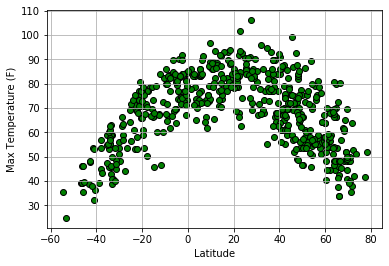

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], 
            facecolor = "green", edgecolor = "black")
# Set x axis 
plt.xlabel("Latitude")
# Set y axis 
plt.ylabel("Max Temperature (F)")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../images/Latitude vs. Temperature Plot.png")
correlation = st.pearsonr(city_df["Lat"],city_df["Max Temp"])

In [10]:
correlation = st.pearsonr(city_df["Lat"],city_df["Max Temp"])
correlation

(-0.012055418937248688, 0.7762991667239338)

#### Latitude vs. Humidity Plot
#No correlation exist

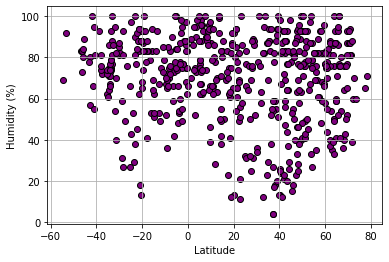

In [11]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Humidity"], 
            facecolor = "purple", edgecolor = "black")
# Set x axis 
plt.xlabel("Latitude")
# Set y axis 
plt.ylabel("Humidity (%)")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../images/Latitudevs.Humidity Plot.png")

In [12]:
correlation = st.pearsonr(city_df["Lat"],city_df["Humidity"])
correlation

(-0.1336152079199589, 0.0015594908417184792)

In [13]:
#### Latitude vs. Cloudiness Plot
# Max cloudiness and min cloudiness does not vary with the latitude. 

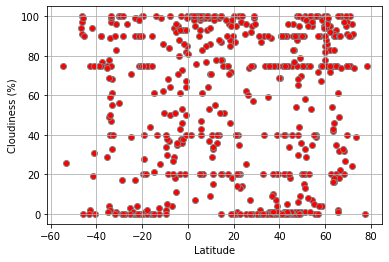

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor = "red", edgecolor = "gray")
# Set x axis
plt.xlabel("Latitude")
# Set y axis label
plt.ylabel("Cloudiness (%)")
# Set y axis limit
plt.ylim(-5,105)
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.8)
#save
plt.savefig("../images/Latitude vs. Cloudiness Plot.png")

In [15]:
correlation = st.pearsonr(city_df["Lat"],city_df["Cloudiness"])
correlation

(0.016140606747311326, 0.7036161641358636)

#### Latitude vs. Wind Speed Plot
#v Low wind speed (under 20) is present in all latitudes

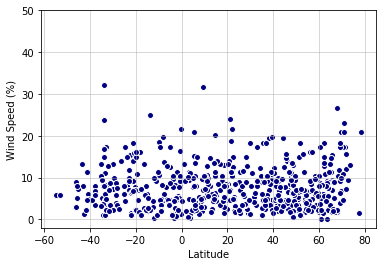

In [16]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor = "navy", edgecolor = "white")
# Set x axis 
plt.xlabel("Latitude")
# Set y axis 
plt.ylabel("Wind Speed (%)")
# Set axis limit
plt.ylim(-2,50)
# display grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
#save
plt.savefig("../images/Latitude vs.Wind Speed Plot.png")

In [17]:
correlation = st.pearsonr(city_df["Lat"],city_df["Wind Speed"])
correlation

(0.019323952362344736, 0.6487569212789636)

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern = city_df.loc[city_df["Lat"] >= 0]
southern = city_df.loc[city_df["Lat"] < 0]

In [19]:
# Create Northern and Southern Hemisphere DataFrames
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotating fuction
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=13,color="darkgreen")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Negative correlation

The r-squared is : -0.67


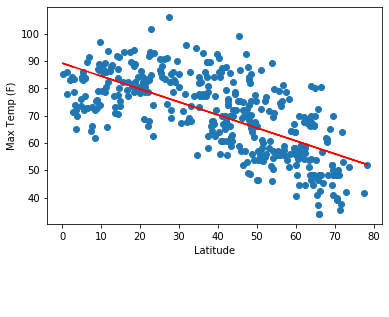

In [20]:
# Call 
equation = linear_agression(northern["Lat"], northern["Max Temp"])
# Call 
annotate(equation, 0, 0)
# y axis label
plt.ylabel("Max Temp (F)")
# x axis label
plt.xlabel("Latitude")
# Create Image
plt.savefig("../images/Northern Hemisphere - Max Temp vs.Latitude Linear Regression.png")

In [21]:
correlation = st.pearsonr(northern["Lat"],northern["Max Temp"])
correlation

(-0.6714701864461429, 2.0956179147175784e-51)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#Positive correlation 

The r-squared is : 0.83


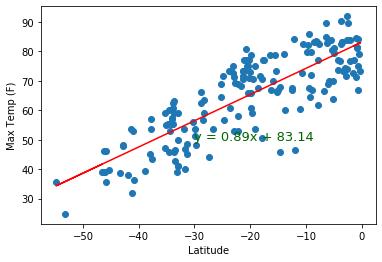

In [22]:
# Call an function to Southern Hemisphere
equation = linear_agression(southern["Lat"],southern["Max Temp"])
# Call 
annotate(equation, -30, 50)
# y axis label
plt.ylabel("Max Temp (F)")
# x axis label
plt.xlabel("Latitude")
# Create Image
plt.savefig("../images/Southern Hemisphere - Max Temp vs.Latitude Linear Regression.png")

In [23]:
correlation = st.pearsonr(southern["Lat"],southern["Max Temp"])
correlation

(0.8272111834113077, 2.003431115281817e-45)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Week  correlation

The r-squared is : -0.04


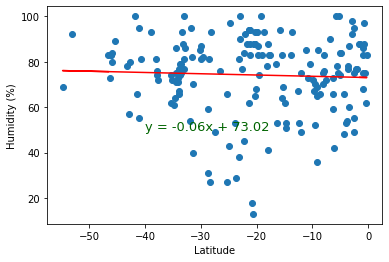

In [24]:
# Call 
equation = linear_agression(southern["Lat"], southern["Humidity"])
# Call 
annotate(equation, -40, 50)
# y axis label
plt.ylabel("Humidity (%)")
# x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../images/Northern Hemisphere - Humidity (%) vs.Latitude Linear Regression.png")

In [25]:
correlation = st.pearsonr(southern["Lat"],southern["Humidity"])
correlation

(-0.0441217400857709, 0.5609349206315299)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is : -0.05


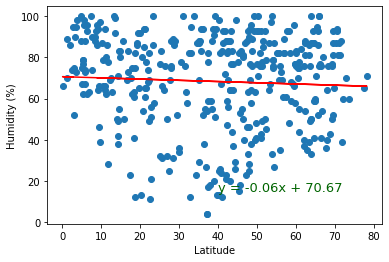

In [26]:
# Call an function #1
equation = linear_agression(northern["Lat"], northern["Humidity"])
# Call an function #2
annotate(equation, 40, 15)
# Set y axis label
plt.ylabel("Humidity (%)")
# Set x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../images/Southern Hemisphe  Humidity (%) vs.Latitude Linear Regression.png")

In [27]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 
#comment: Shows a weak correlation betwwen the two.

The r-squared is : -0.03


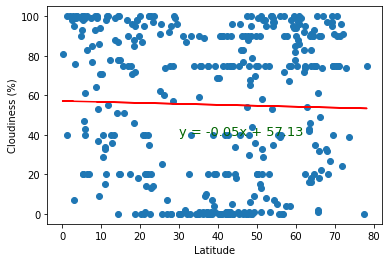

In [28]:
equation = linear_agression(northern["Lat"], northern["Cloudiness"])
annotate(equation, 30, 40)
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness (%)")
#save image
plt.savefig("../images/Northern Hemisphere - Cloudiness (%) vs.Latitude Linear Regression.png")

In [29]:
####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# week correlation 

The r-squared is : -0.04


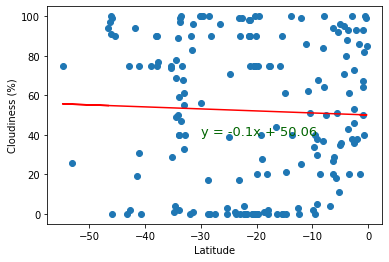

In [30]:
#Call an function #1
equation = linear_agression(southern["Lat"], southern["Cloudiness"])
# Call an function #2
annotate(equation, -30, 40)
# Set x axis label
plt.xlabel("Latitude")
# Set y axis label
plt.ylabel("Cloudiness (%)")
#save
plt.savefig("../images/Southern Hemisphere - Cloudiness (%) vs.latitude Linear Regression.png")

In [31]:
correlation = st.pearsonr(southern["Lat"],southern["Cloudiness"])
correlation

(-0.03817874756833299, 0.6149131602064862)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-squared is : 0.05


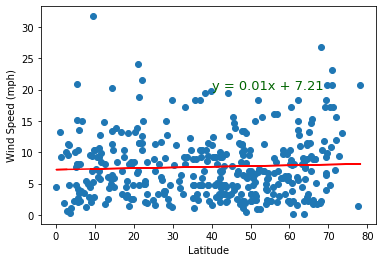

In [32]:
# Call 
equation = linear_agression(northern["Lat"], northern["Wind Speed"])
# Call 
annotate(equation, 40, 20)
# x axis label
plt.xlabel("Latitude")
#y axis label
plt.ylabel("Wind Speed (mph)")
#save
plt.savefig("../images/Northern Hemisphere - Wind Speed (mph) vs.Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#negative correlation 

The r-squared is : 0.01


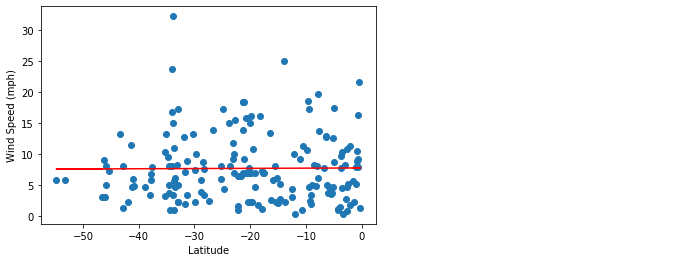

In [33]:
# Call an function #1
equation = linear_agression(southern["Lat"], southern["Wind Speed"])
# Call an function #2
annotate(equation, 40, 20)
# Set y axis label
plt.ylabel("Wind Speed (mph)")
# Set x axis label
plt.xlabel("Latitude")
#save
plt.savefig("../images/Southern Hemisphere - Wind Speed (mph) vs.Latitude Linear Regression.png")